In [3]:
import numpy as np
import yaml

In [8]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [37]:
d = h5py.File('../data/gamma.hdf5', 'r')

In [38]:
d['layer_0'][:].shape


(100000, 3, 96)

In [39]:
np.max(d['layer_0'])

12180.07486026818

In [15]:
first = np.expand_dims(d['layer_0'][:], -1)
first.shape

(100000, 3, 96, 1)

In [17]:
second = np.expand_dims(d['layer_1'][:], -1)
print second.shape
third = np.expand_dims(d['layer_2'][:], -1)
third.shape

(100000, 12, 12, 1)


(100000, 12, 6, 1)

In [18]:
sizes = [
            first.shape[1], first.shape[2],
            second.shape[1], second.shape[2],
            third.shape[1], third.shape[2]
        ]


In [19]:
sizes

[3, 96, 12, 12, 12, 6]

In [27]:
y = [particle] * first.shape[0]

100000

In [30]:
zip([1, 2, 3], [4, 5, 6], [7, 8, 9])

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

In [48]:
def load_data(particle, datafile):

        import h5py

        d = h5py.File(datafile, 'r')
        
        # make our calo images channels-last
        first = np.expand_dims(d['layer_0'][:], -1)
        second = np.expand_dims(d['layer_1'][:], -1)
        third = np.expand_dims(d['layer_2'][:], -1)
        # convert to MeV
        energy = d['energy'][:].reshape(-1, 1) * 1000

        sizes = [
            first.shape[1], first.shape[2],
            second.shape[1], second.shape[2],
            third.shape[1], third.shape[2]
        ]

        y = [particle] * first.shape[0]

        d.close()

        return first, second, third, y, energy, sizes

In [50]:
yaml_file = '/Users/elenaorlova/CaloGAN/models/particles.yaml'
with open(yaml_file, 'r') as stream:
    s = yaml.load(stream)

In [55]:
ls = zip(*[load_data(p, f) for p, f in s.iteritems()])

In [63]:
conc = [np.concatenate(t) for t in ls]

In [71]:
from sklearn.preprocessing import LabelEncoder

In [74]:
print conc[-3]

['positron' 'positron' 'positron' ..., 'gamma' 'gamma' 'gamma']


In [75]:
sizes[:2]

[3, 96]

In [77]:
sizes[2:4] + [1]

[12, 12, 1]

In [95]:
data = '/Users/elenaorlova/CaloGAN/data/area1.pcl'

In [96]:
import pickle

In [97]:
with open(data) as f:
    area1 = pickle.load(f)

In [176]:
data2 = '/Users/elenaorlova/CaloGAN/data/area2.pcl'

In [177]:
with open(data2) as f:
    area2 = pickle.load(f)

In [199]:
len(area1[-1])

854542

In [ ]:
area1[-1]

In [178]:
x = area2[0]

In [252]:
first_image = [a[0] for a in x]

first_image = np.squeeze(np.array(first_image))


second_image = [a[1] for a in x]

second_image = np.squeeze(np.array(second_image))

In [253]:
mean_image_1 = np.mean(first_image, axis=0)
mean_image_2 = np.mean(second_image, axis=0)

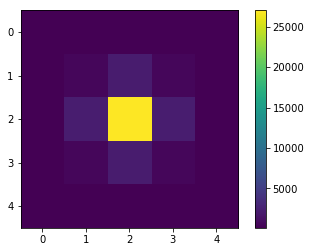

In [254]:
plt.imshow(mean_image_1)
plt.colorbar()

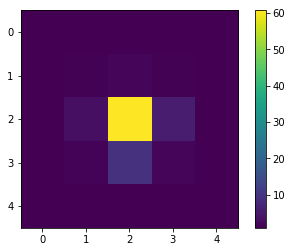

In [255]:
plt.imshow(mean_image_2)
plt.colorbar()

In [259]:
len(area0[0])

880027

In [163]:
x = area1[0]

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
first_image = [a[0] for a in x]

first_image = np.squeeze(np.array(first_image))


second_image = [a[1] for a in x]

second_image = np.squeeze(np.array(second_image))

In [172]:
mean_image_1 = np.mean(first_image, axis=0)
mean_image_2 = np.mean(second_image, axis=0)

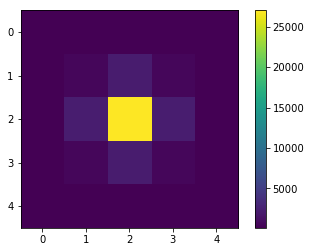

In [173]:
plt.imshow(mean_image_1)
plt.colorbar()

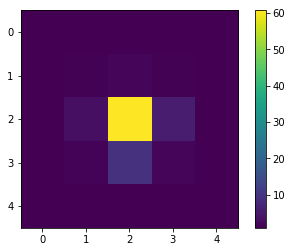

In [174]:
plt.imshow(mean_image_2)
plt.colorbar()

In [45]:
data3 = '/Users/elenaorlova/CaloGAN/data/area0.pcl'

In [46]:
with open(data3) as f:
    area0 = pickle.load(f)

In [72]:
len(area0[0])

880027

In [75]:
energ = np.array(area0[4])

In [76]:
first_image = [a[0] for a in x]

first_image = np.squeeze(np.array(first_image))


second_image = [a[1] for a in x]

second_image = np.squeeze(np.array(second_image))

In [77]:
mean_image_1 = np.mean(first_image, axis=0)
mean_image_2 = np.mean(second_image, axis=0)

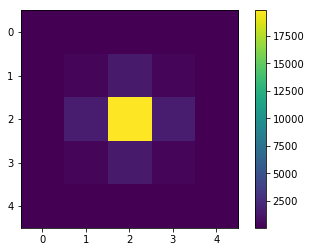

In [78]:
plt.imshow(mean_image_1)
plt.colorbar()

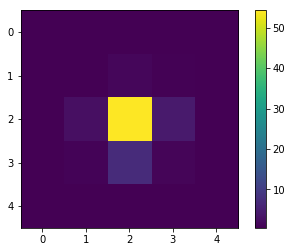

In [79]:
plt.imshow(mean_image_2)
plt.colorbar()

In [80]:
print np.min(first_image)
print np.max(first_image)

-274.521
247002.0


In [81]:
first_image.shape

(880027, 5, 5)

In [82]:
ens = np.max(first_image, axis=(1, 2))

In [83]:
ens.shape

(880027,)

In [84]:
ens

array([  9819.671875  ,   5339.03857422,   9109.03125   , ...,
         8446.14355469,  11371.26171875,  10140.17480469], dtype=float32)

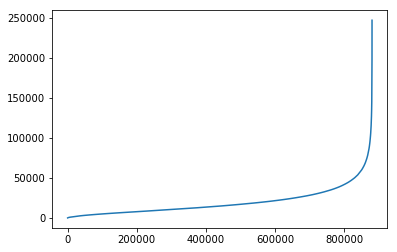

In [85]:
plt.plot(np.sort(ens))

(array([  6.52134000e+05,   1.75396000e+05,   3.72390000e+04,
          1.00260000e+04,   3.34500000e+03,   1.24100000e+03,
          4.20000000e+02,   1.52000000e+02,   5.10000000e+01,
          2.30000000e+01]),
 array([  1.86411041e+02,   2.48680106e+04,   4.95496101e+04,
          7.42312096e+04,   9.89128091e+04,   1.23594409e+05,
          1.48276008e+05,   1.72957608e+05,   1.97639207e+05,
          2.22320807e+05,   2.47002406e+05]),
 <a list of 10 Patch objects>)

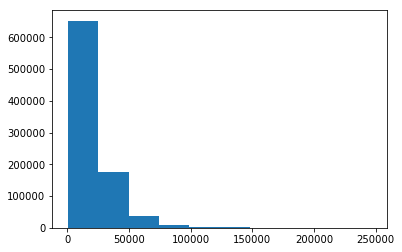

In [86]:
plt.hist(ens)

In [126]:
second_image2 = second_image[:100]

In [127]:
len(second_image2)

100

In [128]:
first_image2 = first_image[:100]
energy = energ[:100]

In [139]:
h5f = h5py.File('girlpower.h5', 'w')

In [140]:
h5f.create_dataset('layer_0', data=second_image2)

<HDF5 dataset "layer_0": shape (100, 5, 5), type "<f4">

In [141]:
h5f.create_dataset('layer_1', data=first_image2)

<HDF5 dataset "layer_1": shape (100, 5, 5), type "<f4">

In [142]:
h5f.create_dataset('energy', data=energy)

<HDF5 dataset "energy": shape (100,), type "<f8">

In [143]:
h5f.close()

In [145]:
% pwd

u'/Users/elenaorlova/.Trash/OurGAN/CaloGAN/models'